In [108]:
import json as pyjson
import pandas as pd
import timeit

import orjson
import rapidjson
import simplejson
import ujson


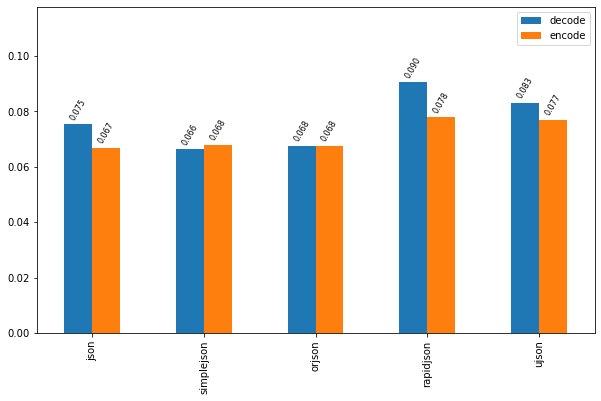

In [133]:
def metrics_json_decode(number, json_file_name):
    json_decode = {}
    with open(json_file_name, "rb") as f:
        data = f.read()
    for json_module in (pyjson, simplejson, orjson, rapidjson, ujson):
        secs = timeit.timeit(lambda: f"json_module.loads(data)", number=number)
        json_decode[json_module.__name__] = secs
    return json_decode


def metrics_json_encode(number, json_file_name):
    json_encode = {}
    with open(json_file_name, "rb") as f:
        large_dict = pyjson.loads(f.read()) 
    for json_module in (pyjson, simplejson, orjson, rapidjson, ujson):
        secs = timeit.timeit(lambda: f"json_module.dumps(large_dict)", number=number)
        json_encode[json_module.__name__] = secs
    return json_encode


number = 1000000
json_decode_metrics = metrics_json_decode(number, "twitter.json")
json_encode_metrics = metrics_json_encode(number, "twitter.json")

metrics = {"decode": json_decode_metrics, "encode": json_encode_metrics}
df = pd.DataFrame(metrics)
chart = df.plot.bar(figsize=(10, 6))
max_value = 0
for p in chart.patches:
     chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=8, color='black', xytext=(0, 15),
         textcoords='offset points', rotation=60)
     if max_value < p.get_height():
         max_value = p.get_height()
_ = chart.set_ylim(0, max_value+max_value*0.3) 